# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

### Spatika Narayanan

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import & Explore Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
from torchvision import datasets
train_data = datasets.ImageFolder(root='/data/dog_images/train')
test_data = datasets.ImageFolder(root='/data/dog_images/valid')
valid_data = datasets.ImageFolder(root='/data/dog_images/test')

In [4]:
print(len(train_data))
print(len(test_data))
print(len(valid_data))

6680
835
836


In [5]:
train_data.classes

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [31]:
from PIL import Image
from matplotlib.pyplot import imshow

sample_train_data = train_data.__getitem__(1)

print(sample_train_data[0])

<PIL.Image.Image image mode=RGB size=480x360 at 0x7FC430661C50>


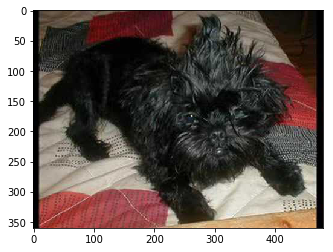

In [32]:
imshow(sample_train_data[0])

In [36]:
from PIL import Image
from matplotlib.pyplot import imshow

sample_test_data = train_data.__getitem__(12)

print(sample_test_data[0])

<PIL.Image.Image image mode=RGB size=596x600 at 0x7FC4305F6F60>


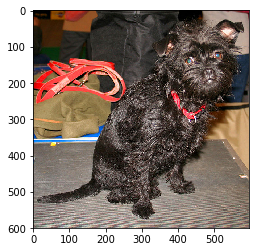

In [37]:
imshow(sample_test_data[0])

In [38]:
from PIL import Image
from matplotlib.pyplot import imshow

sample_valid_data = train_data.__getitem__(100)

print(sample_valid_data[0])

<PIL.Image.Image image mode=RGB size=334x250 at 0x7FC436237FD0>


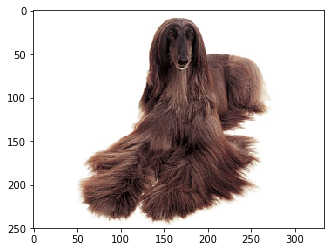

In [39]:
imshow(sample_valid_data[0])

In [6]:
from collections import Counter
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

class_counts = dict(Counter(sample_tup[1] for sample_tup in train_data))
class_counts = dict(sorted(class_counts.items()))


In [7]:
class_counts

{0: 64,
 1: 58,
 2: 52,
 3: 63,
 4: 77,
 5: 64,
 6: 50,
 7: 66,
 8: 34,
 9: 50,
 10: 66,
 11: 66,
 12: 46,
 13: 69,
 14: 73,
 15: 59,
 16: 62,
 17: 50,
 18: 48,
 19: 62,
 20: 64,
 21: 47,
 22: 65,
 23: 62,
 24: 37,
 25: 41,
 26: 64,
 27: 35,
 28: 74,
 29: 52,
 30: 56,
 31: 65,
 32: 45,
 33: 64,
 34: 53,
 35: 65,
 36: 50,
 37: 57,
 38: 69,
 39: 53,
 40: 69,
 41: 63,
 42: 50,
 43: 64,
 44: 53,
 45: 67,
 46: 54,
 47: 54,
 48: 50,
 49: 50,
 50: 62,
 51: 49,
 52: 47,
 53: 57,
 54: 50,
 55: 65,
 56: 71,
 57: 50,
 58: 47,
 59: 60,
 60: 61,
 61: 53,
 62: 53,
 63: 39,
 64: 42,
 65: 33,
 66: 34,
 67: 63,
 68: 51,
 69: 47,
 70: 62,
 71: 48,
 72: 42,
 73: 41,
 74: 44,
 75: 64,
 76: 43,
 77: 40,
 78: 59,
 79: 46,
 80: 56,
 81: 61,
 82: 46,
 83: 50,
 84: 37,
 85: 53,
 86: 66,
 87: 51,
 88: 53,
 89: 58,
 90: 57,
 91: 44,
 92: 35,
 93: 44,
 94: 49,
 95: 43,
 96: 50,
 97: 46,
 98: 42,
 99: 34,
 100: 48,
 101: 29,
 102: 58,
 103: 42,
 104: 31,
 105: 50,
 106: 46,
 107: 26,
 108: 45,
 109: 33,
 110: 44,


In [44]:

test_counts = dict(Counter(sample_tup[1] for sample_tup in test_data))
test_counts = dict(sorted(test_counts.items()))

In [45]:
valid_counts = dict(Counter(sample_tup[1] for sample_tup in valid_data))
valid_counts = dict(sorted(valid_counts.items()))

In [95]:
valid_counts

{0: 8,
 1: 8,
 2: 6,
 3: 8,
 4: 10,
 5: 8,
 6: 7,
 7: 8,
 8: 4,
 9: 6,
 10: 9,
 11: 9,
 12: 6,
 13: 9,
 14: 10,
 15: 8,
 16: 8,
 17: 7,
 18: 6,
 19: 8,
 20: 8,
 21: 6,
 22: 8,
 23: 8,
 24: 4,
 25: 5,
 26: 8,
 27: 4,
 28: 10,
 29: 7,
 30: 7,
 31: 8,
 32: 5,
 33: 8,
 34: 6,
 35: 8,
 36: 6,
 37: 7,
 38: 9,
 39: 7,
 40: 9,
 41: 8,
 42: 6,
 43: 8,
 44: 7,
 45: 9,
 46: 7,
 47: 7,
 48: 6,
 49: 6,
 50: 8,
 51: 6,
 52: 6,
 53: 7,
 54: 7,
 55: 9,
 56: 9,
 57: 7,
 58: 6,
 59: 8,
 60: 8,
 61: 6,
 62: 7,
 63: 5,
 64: 5,
 65: 4,
 66: 4,
 67: 8,
 68: 7,
 69: 6,
 70: 8,
 71: 6,
 72: 5,
 73: 5,
 74: 5,
 75: 8,
 76: 5,
 77: 5,
 78: 8,
 79: 5,
 80: 7,
 81: 8,
 82: 6,
 83: 6,
 84: 4,
 85: 7,
 86: 8,
 87: 6,
 88: 7,
 89: 8,
 90: 7,
 91: 5,
 92: 4,
 93: 5,
 94: 6,
 95: 5,
 96: 6,
 97: 5,
 98: 5,
 99: 4,
 100: 6,
 101: 3,
 102: 7,
 103: 5,
 104: 4,
 105: 6,
 106: 6,
 107: 3,
 108: 5,
 109: 4,
 110: 5,
 111: 7,
 112: 5,
 113: 4,
 114: 8,
 115: 4,
 116: 6,
 117: 7,
 118: 4,
 119: 5,
 120: 3,
 121: 4,
 122: 5,


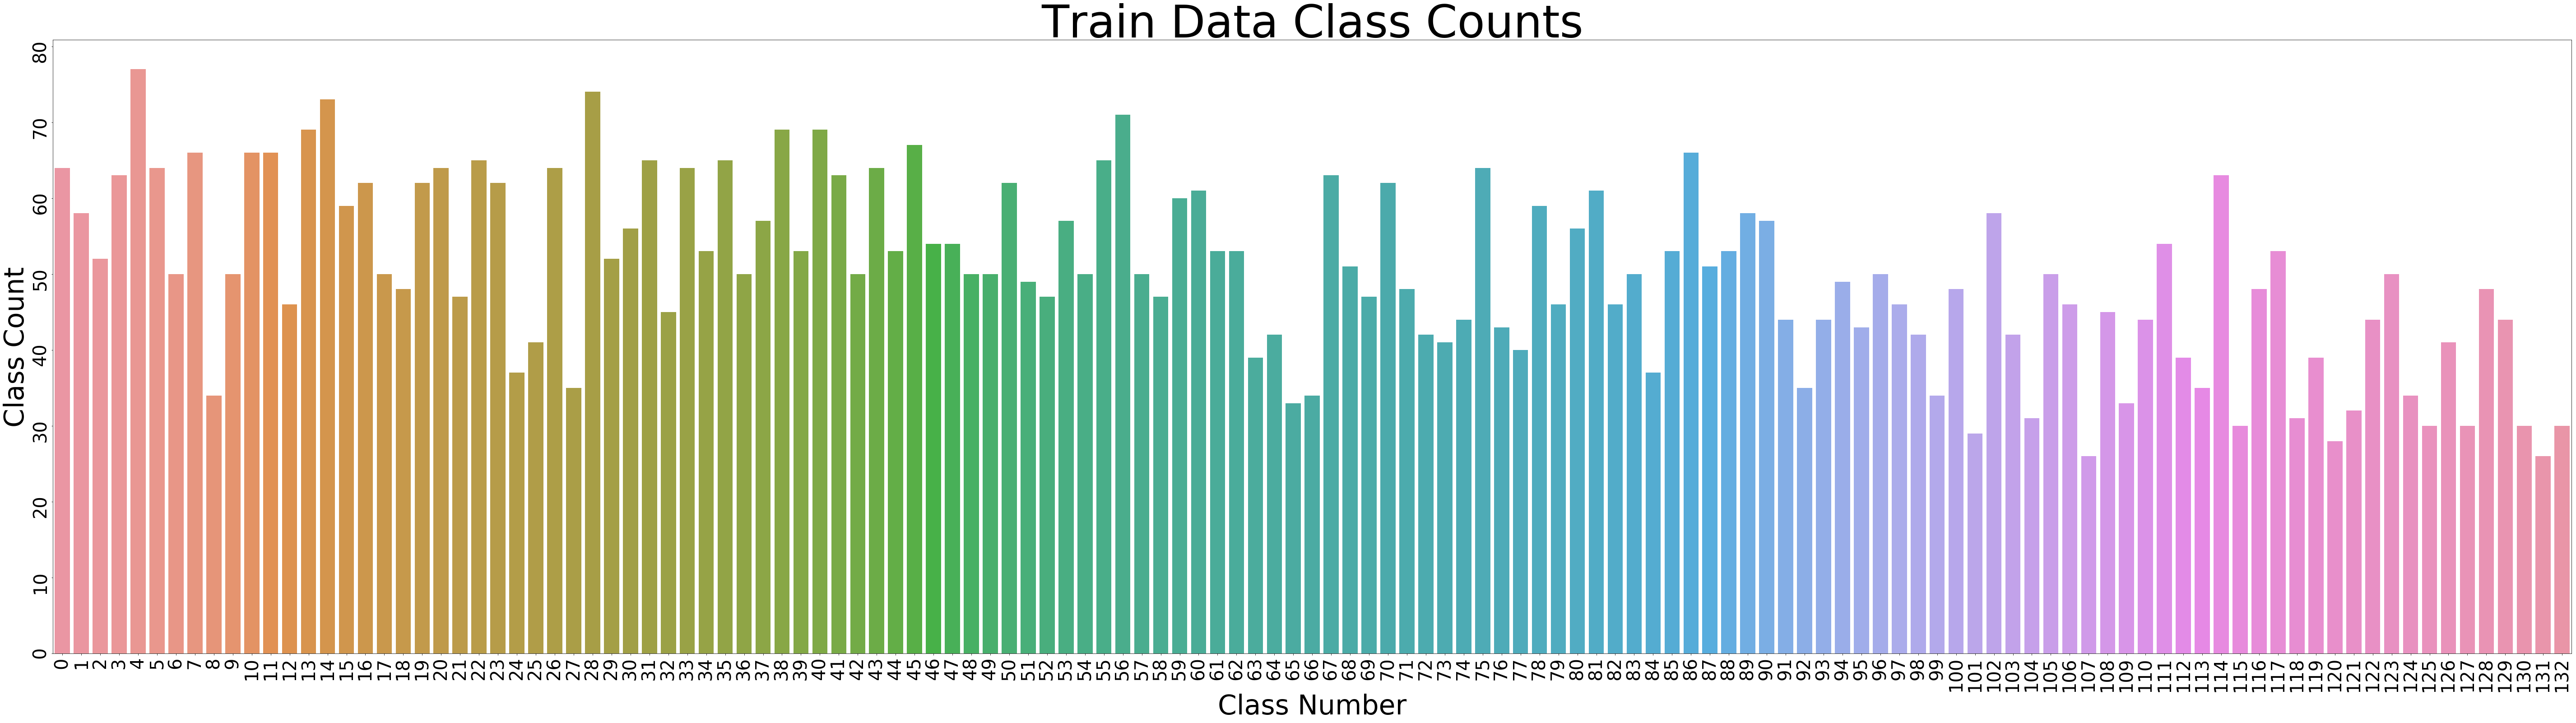

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

keys = class_counts.keys()
values = class_counts.values()

keys = list(keys)
# get values in the same order as keys, and parse percentage values
vals = list(values)


plt.figure(figsize=(100,25))
ax = sns.barplot(x=keys, y=values)


ax.set_title("Train Data Class Counts",fontsize=100)
ax.set_xlabel("Class Number",fontsize=60)
ax.set_ylabel("Class Count",fontsize=60)
ax.tick_params(labelsize=40, rotation=90)

plt.show(ax, block=False)
plt.savefig("test")
plt.cla()
plt.clf()
plt.close('all')

In [113]:
plt.close('all')

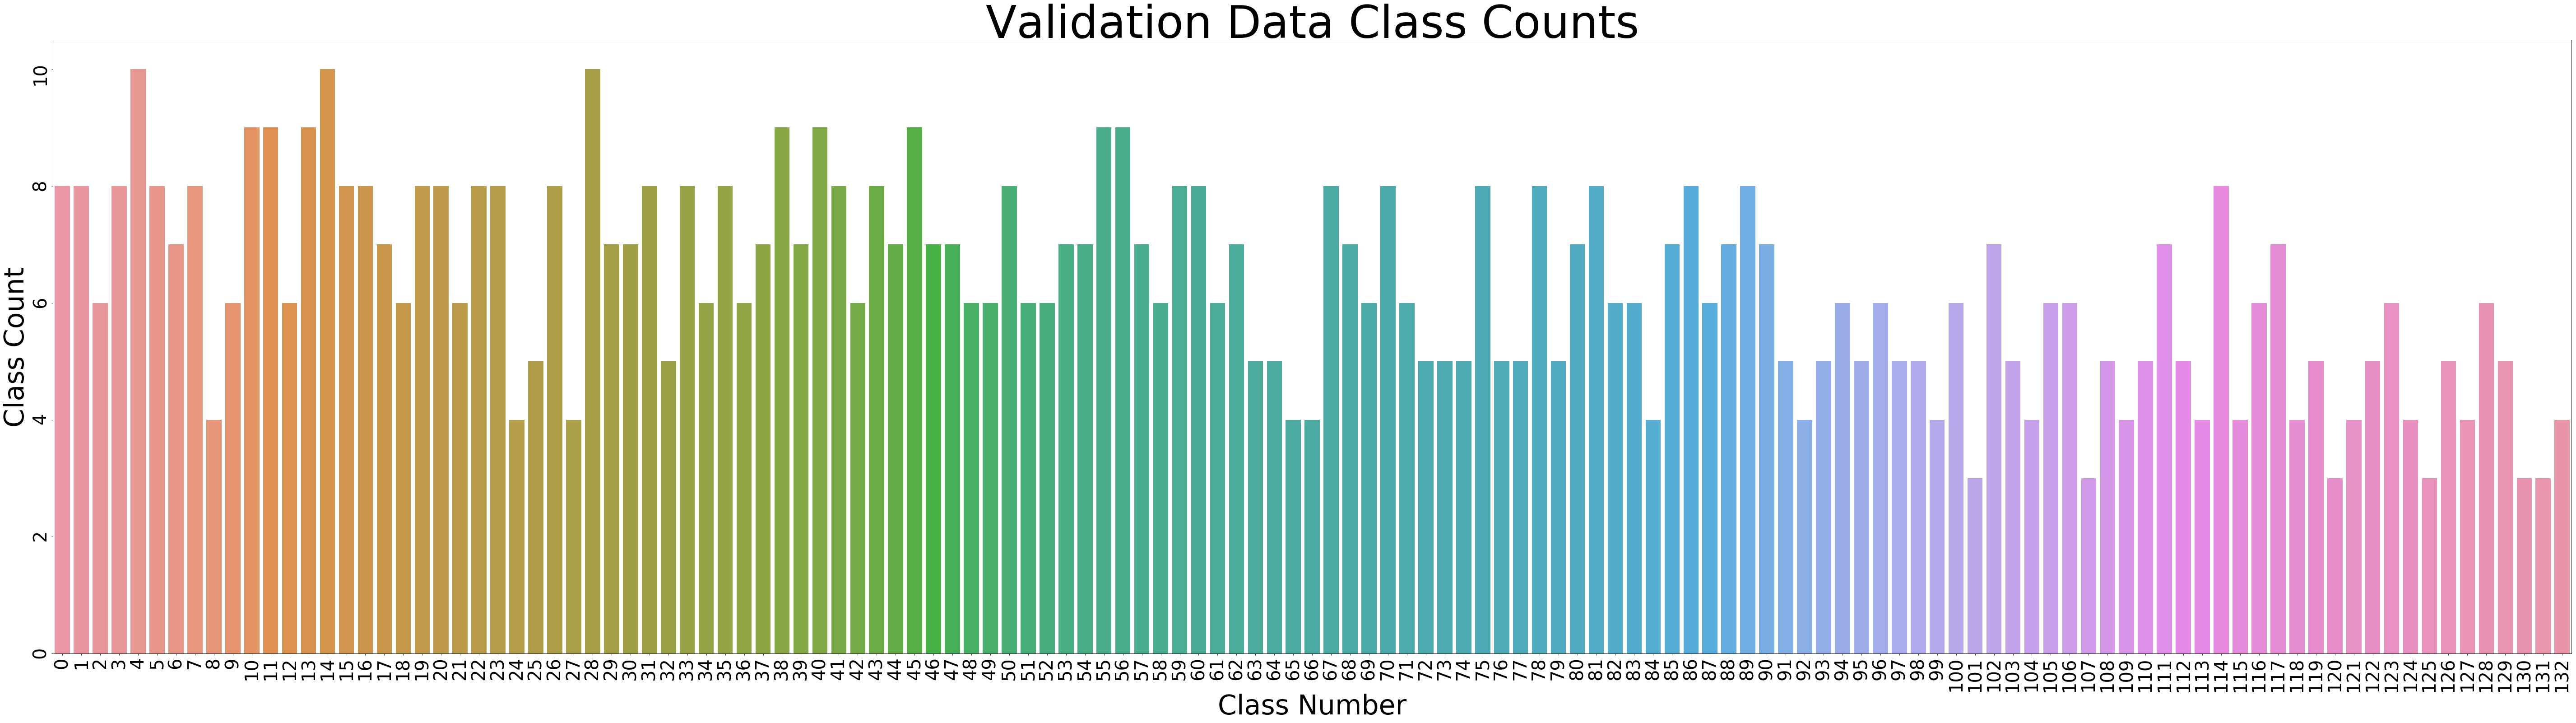

In [116]:
keys = list(valid_counts.keys())
values = list(valid_counts.values())

plt.figure(figsize=(100,25))
ax = sns.barplot(x=keys, y=values)

ax.set_title("Validation Data Class Counts",fontsize=100)
ax.set_xlabel("Class Number",fontsize=60)
ax.set_ylabel("Class Count",fontsize=60)
ax.tick_params(labelsize=40, rotation=90)

plt.show(ax)

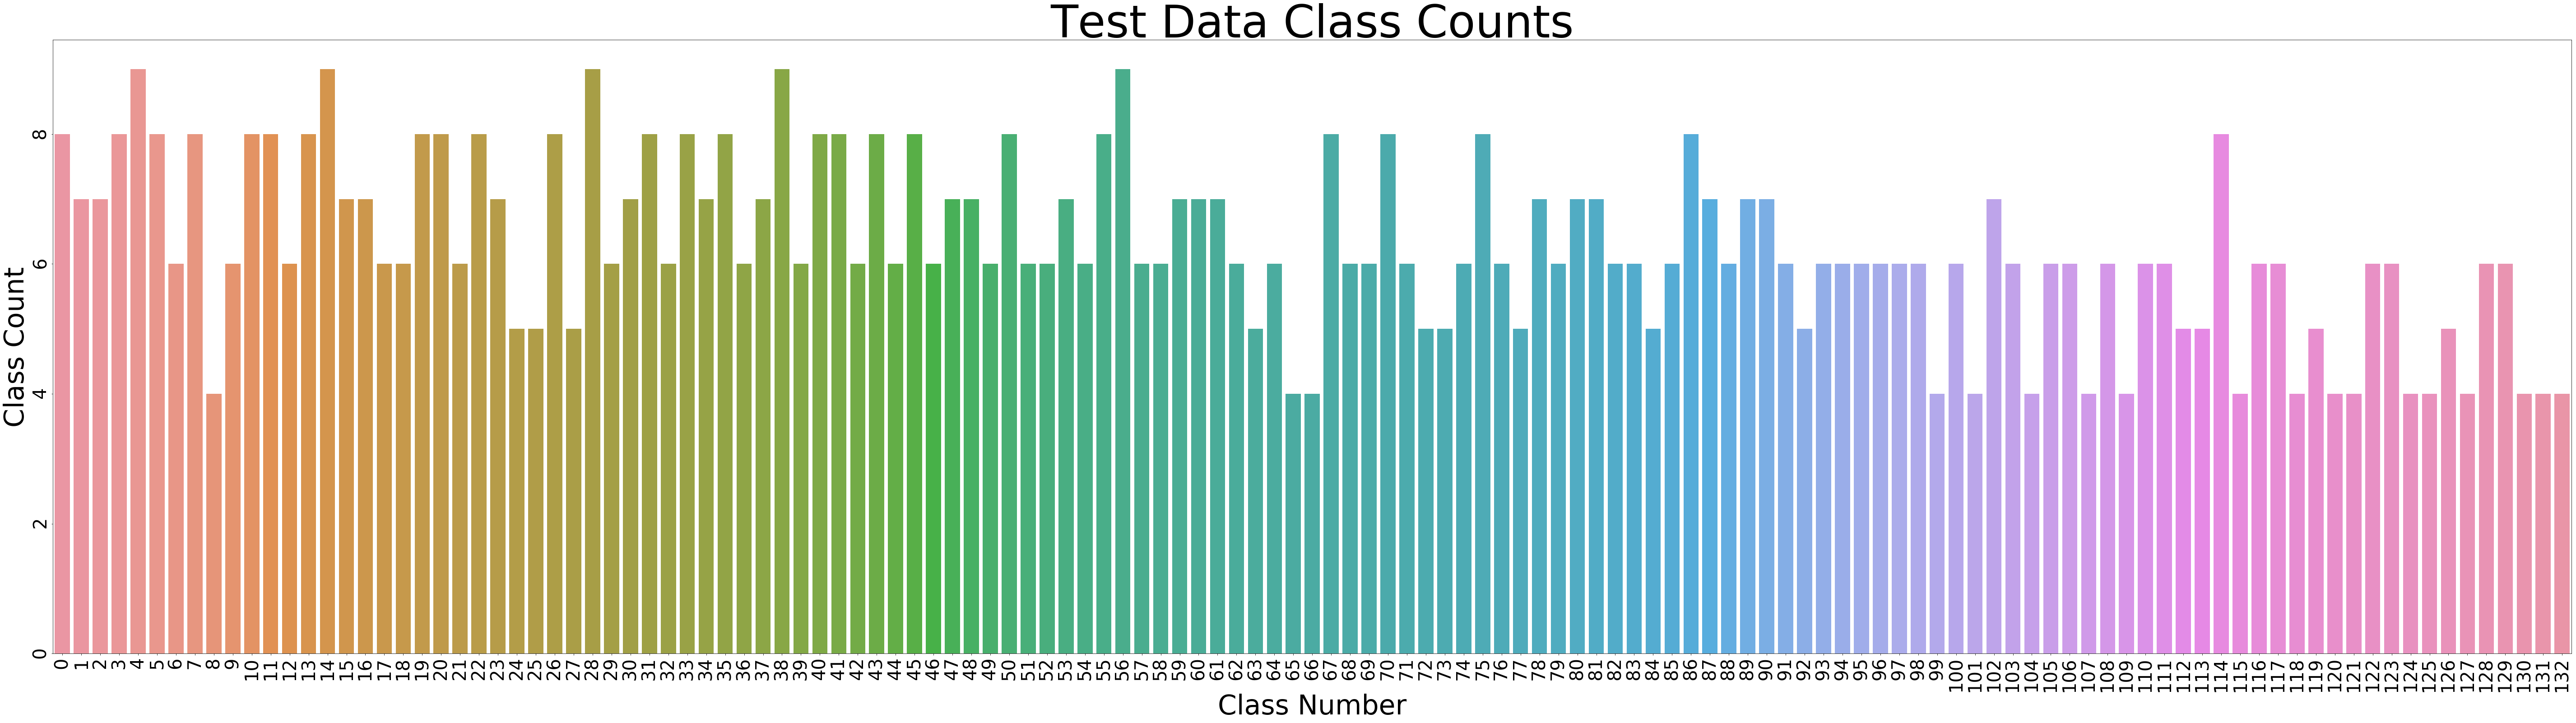

In [117]:
keys = list(test_counts.keys())
values = list(test_counts.values())

plt.figure(figsize=(100,25))
bx = sns.barplot(x=keys, y=values)

bx.set_title("Test Data Class Counts",fontsize=100)
bx.set_xlabel("Class Number",fontsize=60)
bx.set_ylabel("Class Count",fontsize=60)
bx.tick_params(labelsize=40, rotation=90)

plt.show(bx)

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


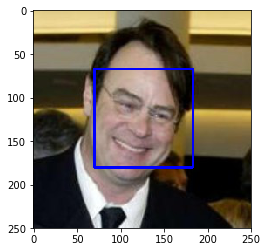

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

98 of the human images are correctly detected as human, 17 of the dog images are incorrectly 'detected' as human.

Percentage of human images with detcted face = 98%

Percentage of dog images with detected face = 17%

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
percent_true_human = np.sum([face_detector(face) for face in human_files_short])
percent_false_human = np.sum([face_detector(face) for face in dog_files_short])

print(percent_true_human)
print(percent_false_human)

98
17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 105153357.73it/s]


In [6]:
print(use_cuda)

True


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True # included to prevent truncated image error when training CNN scratch model



def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    
    ## load 
    dog_img = Image.open(img_path)
    
    ## pre-process an image from the given img_path
    
    # build a transformer; normalization values are in expected values in PyTorch documentation for ImageNet trained models
    transformer = transforms.Compose(
    [transforms.Resize(256), transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

    # mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224
    trans_img=transformer(dog_img)
    # convert to mini-batch of size 1
    mini_batch=trans_img.unsqueeze(0)
    
    ## Return the *index* of the predicted class for that image
    out_tensor = VGG16(mini_batch.cuda())
    idx = out_tensor.cpu().data.numpy().argmax() 
    
    return idx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx_list = range(151,269)
    
    idx = VGG16_predict(img_path)
    
    dog_detected = False
    
    if idx in idx_list:
        dog_detected = True
    
    return dog_detected # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

Detected dog percentage in human_files_short = 0%

Detected dog percentage in dog_files_short = 100%

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
percent_false_dog = np.sum([dog_detector(face) for face in human_files_short])
percent_true_dog = np.sum([dog_detector(face) for face in dog_files_short])

print(percent_false_dog)
print(percent_true_dog)

0
100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [10]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
transformer = transforms.Compose(
    [transforms.Resize(256), transforms.RandomResizedCrop(224, ratio=(1,1)), # keep aspect ratio but resize 0.8 to 1
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation((10,20)), # degrees to rotate by: min, max for the range are specified
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])


test_transformer = transforms.Compose(
    [transforms.Resize(256), transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(root='/data/dog_images/train',
                                           transform=transformer)
test_data = datasets.ImageFolder(root='/data/dog_images/valid',
                                           transform=test_transformer)
valid_data = datasets.ImageFolder(root='/data/dog_images/test',
                                           transform=test_transformer)

data = {"train" : train_data, "valid" : valid_data, "test" : test_data}

BATCH_SIZE = 32
NUM_WORKERS = 0

train_loader = torch.utils.data.DataLoader(train_data,
                                             batch_size=BATCH_SIZE, shuffle=True,
                                             num_workers=NUM_WORKERS, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                             batch_size=BATCH_SIZE, shuffle=True,
                                             num_workers=NUM_WORKERS, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                             batch_size=BATCH_SIZE, shuffle=True,
                                             num_workers=NUM_WORKERS, pin_memory=True)

loaders_scratch = {'train': train_loader, 'test': test_loader, 'valid': valid_loader}

NUM_CLASSES = len(train_data.classes)

In [11]:
print(NUM_CLASSES)

133


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Dataset augmentation has proven to be invaluable for deep learning, which typically needs a large dataset size in order to perform to its full potential. So I decided to use the following transformations:

* Instead of CenterCrop to size 224x224 that I used before,  I used RandomResizedCrop which still produces an image of 224x224, but first scales down to between 0.8-1.0 of the original image.
* I used RandomHorizontalFlip as there are bound to be images of dogs facing in either direction.
* I also used RandomRotate with a rotation range of 10 to 20 degrees, again to simulate additional images of dogs that may not be in the exact same orientation, while still keeping the scenarios realistic.

The reason I chose 224x224 for the input tensor is so that we can continue to use the same data loaders for Step 4 Transfer Learning. Minimum image size for most of the pre-trained models is 224x224. We can also more easily compare performance by doing this.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class

    
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.cnn_layers = nn.Sequential(
            # First 2D conv layer, with it's own batch norm, ReLU, max pooling
            nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # output img size 224/4 = 56
            
            # Second 2D conv layer, with it's own batch norm, ReLU, max pooling
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # output img size = 56/4 = 14
            
            # Third 2D conv layer, with it's own batch norm, ReLU, max pooling
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # output img size = 14/2 = 7 (stride default is 1)
        )
        
        
        # dropout layer
        self.dropout = nn.Dropout(0.20)

        # fully connected output layers, img size from prev max pooling is 7*7, and there are 128 i/p channels
        self.fc1 = nn.Linear(128*49, 512)
        self.fc2 = nn.Linear(512, NUM_CLASSES)
    
    def forward(self, x):
        ## Define forward behavior
        x = self.cnn_layers(x)        
        x = x.view(x.size(0), -1)
     
        # first forward layer
        x = self.dropout(x)
        x = self.fc1(x)

        
        # dropout to prevent overfitting
        x = self.dropout(x)
        x = self.fc2(x)

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dropout): Dropout(p=0.2)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=

In [14]:
model_scratch.parameters()

<generator object Module.parameters at 0x7fdc442d8af0>

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

For the architecture I followed a simple model with 3 convolutional layers with kernel size 3. Smaller kernel sizes are preferred over larger kernel sizes, and odd over even: https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363. 3x3 convolutional filter is a popular choice.

For a starting point, I referred to the following PyTorch documentation and [Medium article](https://medium.com/swlh/deep-learning-for-image-classification-creating-cnn-from-scratch-using-pytorch-d9eeb7039c12#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjAzYjJkMjJjMmZlY2Y4NzNlZDE5ZTViOGNmNzA0YWZiN2UyZWQ0YmUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MTIwNjI0MDQsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNDEzNjI2MDE5MjUzMzI5MjExNCIsImVtYWlsIjoic3BhdGlrYS5uQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiU3BhdGlrYSBOYXJheWFuYW4iLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EtL0FPaDE0R2hRR1B0TnpCVEZrb0o4TjJ6NUFNTnVCRk9YZjdlR0xpZW00N01yN1c0PXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6IlNwYXRpa2EiLCJmYW1pbHlfbmFtZSI6Ik5hcmF5YW5hbiIsImlhdCI6MTYxMjA2MjcwNCwiZXhwIjoxNjEyMDY2MzA0LCJqdGkiOiJlOTg1YzVkM2M0MGRlMWMwZjZjZDIwOGIyMTVlNzc0MzMwN2Y5OWY1In0.DGa2e7wp2P5EbxsLDzyRcFjQ2ZR9JRLwISL6t2T14zNEMaP_EQA1hYlV6xaXYOpYCtMNxOiJqm_cnmK9aEe4BHxWEGCtBjYPTelb7Cu-p1fqiUG7GTFkM8n6amS4pr2QU0mjUMIQ6acdIAH5JgqJjC-RIAbPItw30gyz1yLxtWM8UMnjuZMz7Lm8-urayfr3mmONBDqgrhoD5jGKd4B8shtAyUD7rQcF4c44ltIogNUN99f1tUcOt7aN1yiD3ALNTl9kWORRopafoJXds5mel46KAUQmqqQExw2Qbh0qeowKC4TX5Gc2223d5JkLcrnvKyWrdHjktovHHP6rylmfnQ):
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-convolutional-neural-network


With each layer, the number of output channels increases, but the image output size decreases (if stride Conv2D set to 2). 

Next, I added operations for each convolutional layers as follows.

Each Conv2D layer has:
* **Batch Normalization**: to prevent the optimizer from oscillating in a plateau, each batch is normalized so all features are on the same scale
* **ReLU**: Commonly used activiation function for CNNs
* **Max Pooling**: For down-sampling, a best practice after non-linearity is applied. This is found to be better than average pooling for tasks like image recongition. If stride is 2 for this layer, output size is further scaled down by 2.

I further defined 2 dropout layers, applied to each fully connected layer, to prevent overfitting, with a small dropout probability of 0.2 (20%). These layers are needed to transition from feature maps, to the output prediction. 

We use two fully connected layers, so that the first FC layer can abstract out key features and reduce size (6272 --> 512) before the final FC layer predicts the output class. Output size of 512 for FC1 is commonly used in CNN architectures.

I also reduced # of epochs from 100 to 30, to reduce training time and as the validation loss was already low. 
Test Accuracy (below) also was above the threshold required for this task: 10% was expected, accuracy produced is 22%.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer, Adam is known to be better than SGD
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001) 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
import time

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        
        start_time = time.time()  
    
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(data)
            loss = criterion(outputs, target)
            train_loss += loss.item()*data.size(0) # number of images in batch
            
            loss.backward() # calculate gradients
            optimizer.step()
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
             
            # forward and loss calculation
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss += loss.item()*data.size(0)
            
        # average train and valid loss
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
            
            
        # print training/validation statistics 
        print('Epoch: {} took {:.3f} seconds. \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch,
            time.time() - start_time,
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Decrease in validation loss. Saving new model.')
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [92]:
# train the model
model_scratch = train(30, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 took 104.373 seconds. 	Training Loss: 5.189920 	Validation Loss: 4.585801
Decrease in validation loss. Saving new model.
Epoch: 2 took 103.917 seconds. 	Training Loss: 4.565079 	Validation Loss: 4.260851
Decrease in validation loss. Saving new model.
Epoch: 3 took 102.937 seconds. 	Training Loss: 4.389897 	Validation Loss: 4.098423
Decrease in validation loss. Saving new model.
Epoch: 4 took 102.443 seconds. 	Training Loss: 4.278933 	Validation Loss: 4.009973
Decrease in validation loss. Saving new model.
Epoch: 5 took 102.218 seconds. 	Training Loss: 4.188208 	Validation Loss: 3.880497
Decrease in validation loss. Saving new model.
Epoch: 6 took 102.628 seconds. 	Training Loss: 4.101548 	Validation Loss: 3.859098
Decrease in validation loss. Saving new model.
Epoch: 7 took 102.191 seconds. 	Training Loss: 3.969797 	Validation Loss: 3.758626
Decrease in validation loss. Saving new model.
Epoch: 8 took 101.915 seconds. 	Training Loss: 3.905473 	Validation Loss: 3.730743
Decreas

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [25]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [93]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.423710


Test Accuracy: 22% (189/835)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [18]:
import torch 
print(torch.__version__)

0.4.0


In [19]:
import torch
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture


##################################
########### SQUEEZENET ###########
##################################
# model_transfer = models.squeezenet1_0(pretrained=True)

# # freezing params; no backprop
# for param in model_transfer.parameters():
#     param.requires_grad = False

# model_transfer.classifier[1] = nn.Conv2d(512, 133, kernel_size=(1,1), stride=(1,1))
# model_transfer.num_classes = 133
    
####################################

##################################
########### RESNET101 ############
##################################

# model_transfer = models.resnet101(pretrained=True)
    
# # freeze parameters; no backprop
# for param in model_transfer.parameters():
#     param.requires_grad = False

# # replace the last FC layer
# num_ftrs = model_transfer.fc.in_features
# model_transfer.fc = nn.Linear(num_ftrs, 133)


##################################
########### DENSENET ############
##################################

model_transfer = models.densenet121(pretrained=True)

# freeze params; no backprop
for param in model_transfer.parameters():
    param.requires_grad = False

num_ftrs = model_transfer.classifier.in_features
model_transfer.classifier = nn.Linear(num_ftrs, 133)


#####################################

print(model_transfer)


if use_cuda:
    model_transfer = model_transfer.cuda()

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 90152392.36it/s]


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

We eliminated AlexNet, VGG and GoogleNet in favour of the newer and more recent models which are built on top of improvements from these. The choice was also limited by the constraint of PyTorch used in the Udacity workspace provided, which is 0.4.0. Based on this, we finalized the following:
•	SqueezeNet – a more lightweight version of AlexNet – “AlexNet level accuracy with 50x fewer parameters” [22]
•	ResNet-101: Variation of a winning entry in ILSVRC (ImageNet Large Scale Visual Recognition Challenge)
•	Densenet-121: Best Paper Award – Conference of Computer Vision and Pattern Recognition 2017; similar accuracy to ResNet but half the parameters

Referred to this image from https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/ to shortlist the models:

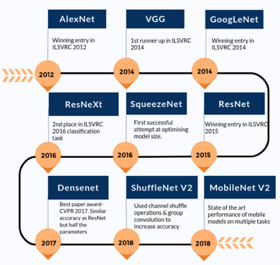



Fine-tuning: For all layers besides the final classification/fully connected layers, the parameters were frozen. Each transfer learning model used required slightly different fine-tuning. For example, Densenet-121, the classifier is modified to a linear layer with output of size 133 – since we have 133 classes to predict.

The 3 models were compared. Then Densenet-121 was additionally run for 30 epochs to see change in accuracy/if there is any overfitting caused. Since the accuracy was about the same with 30 epochs (81%). This was chosen as the final model

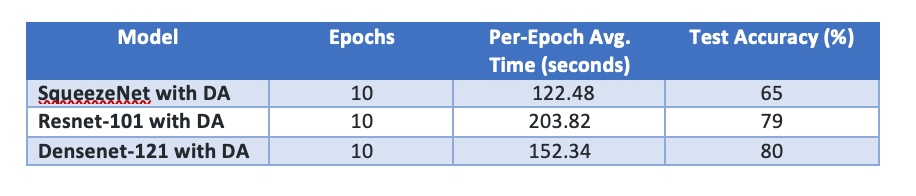

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [20]:
criterion_transfer = nn.CrossEntropyLoss()

optimizer_transfer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001) # only need to optimize classifier parameters; densenet, squeezenet
# optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001) # # only need to optimize fc parameters; resnet

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [27]:
# train the model
n_epochs = 30
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 took 154.131 seconds. 	Training Loss: 0.970520 	Validation Loss: 0.671456
Decrease in validation loss. Saving new model.
Epoch: 2 took 153.605 seconds. 	Training Loss: 0.929674 	Validation Loss: 0.667275
Decrease in validation loss. Saving new model.
Epoch: 3 took 153.513 seconds. 	Training Loss: 0.906856 	Validation Loss: 0.707873
Epoch: 4 took 154.551 seconds. 	Training Loss: 0.916665 	Validation Loss: 0.658589
Decrease in validation loss. Saving new model.
Epoch: 5 took 154.418 seconds. 	Training Loss: 0.891734 	Validation Loss: 0.675161
Epoch: 6 took 153.854 seconds. 	Training Loss: 0.872875 	Validation Loss: 0.677334
Epoch: 7 took 152.225 seconds. 	Training Loss: 0.884683 	Validation Loss: 0.676404
Epoch: 8 took 155.368 seconds. 	Training Loss: 0.868458 	Validation Loss: 0.658091
Decrease in validation loss. Saving new model.
Epoch: 9 took 155.795 seconds. 	Training Loss: 0.871647 	Validation Loss: 0.642369
Decrease in validation loss. Saving new model.
Epoch: 10 took 155

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [28]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.694098


Test Accuracy: 81% (677/835)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [29]:
data_transfer = data

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    dog_img = Image.open(img_path)
    plt.imshow(dog_img)
    plt.show()
    
    # mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224
    trans_img=test_transformer(dog_img)
    
    # convert to mini-batch of size 1
    mini_batch=trans_img.unsqueeze(0)
    
    model_transfer.eval()
    out_tensor = model_transfer(mini_batch.cuda())
    idx = out_tensor.cpu().data.numpy().argmax() 
    
    return class_names[idx]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if(dog_detector(img_path)):
        print("This dog is a: ", predict_breed_transfer(img_path))
    
    elif (face_detector(img_path)):
        print("You look like a: ", predict_breed_transfer(img_path))
        
    else:
        print("Error! Neither human nor dog detected.")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

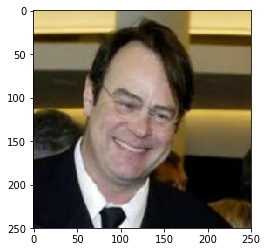

You look like a:  Beagle


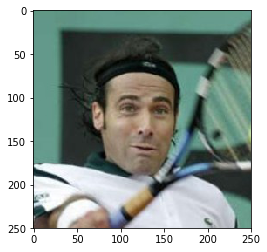

You look like a:  Dalmatian


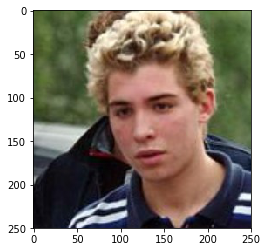

You look like a:  American water spaniel


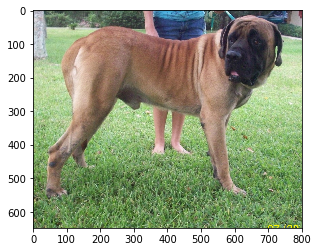

This dog is a:  Mastiff


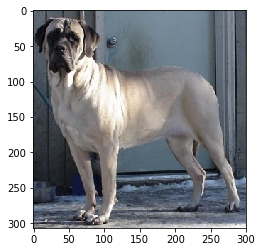

This dog is a:  Mastiff


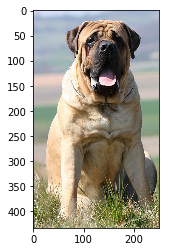

This dog is a:  Cane corso


In [37]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)